# 線形回帰

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 【問題1】～【問題5】

In [2]:
# 【問題4】平均二乗誤差
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.mean((y_pred - y)**2)
    return mse

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    # 【問題1】仮定関数
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        return X @ self.theta
    
    # 【問題2】最急降下法
    def _gradient_descent(self, X, y):
        """
        最急降下法でパラメータを1回更新する
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        y_pred = self._linear_hypothesis(X)
        
        # m: データ数, n: パラメータ数
        m, n = X.shape
        
        # それぞれのパラメータを更新する
        for j in range(n):
            self.theta[j] = self.theta[j] - self.lr / m * np.sum((y_pred - y) * X[:,j])
    
    # 【問題5】目的関数
    def _loss_func(self, y_pred, y):
        return MSE(y_pred, y) / 2
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        if not self.no_bias:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack([bias, X])
            
            if (X_val is not None) and (y_val is not None):
                bias = np.ones((X_val.shape[0], 1))
                X_val = np.hstack([bias, X_val])
        
        # パラメータを初期化
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.iter):
            # 学習データの損失を保存
            pred = self._linear_hypothesis(X)
            self.loss[i] = self._loss_func(pred, y)
            
            # 検証データの損失を保存
            if (X_val is not None) and (y_val is not None):
                pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = self._loss_func(pred, y_val)
            
            # パラメータを更新
            self._gradient_descent(X, y)
        
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                if (i+1) % 50 == 0 or i == 0:
                    if (X_val is not None) and (y_val is not None):
                        print(f'[epoch {i+1}] loss: {self.loss[i]} val_loss: {self.val_loss[i]}')
                    else:
                        print(f'[epoch {i+1}] loss: {self.loss[i]}')
    
    # 【問題3】推定
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if not self.no_bias:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack([bias, X])
        
        return self._linear_hypothesis(X)

## 【問題6】学習と推定

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("train.csv")

X = data.drop('SalePrice', axis=1)
# 数値列のみ抽出
X = X.select_dtypes(include='number')
# 欠損値列を削除
X = X.dropna(axis=1)

y = data[['SalePrice']]

# ホールドアウト
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

print(X_train_std.shape, X_test_std.shape, y_train.shape, y_test.shape)

(1095, 34) (365, 34) (1095,) (365,)


In [4]:
slr = ScratchLinearRegression(num_iter=300, lr=0.01, no_bias=False, verbose=True)
slr.fit(X_train_std, y_train, X_test_std, y_test)
pre = slr.predict(X_test_std)

# plt.scatter(y_test, pre)
# plt.show()

# plt.scatter(X_train_std[:,11], y_train, label="TRAIN")
# plt.scatter(X_test_std[:,11], y_test, label="VALID")
# plt.legend()
# plt.plot();

[epoch 1] loss: 19610192755.663925 val_loss: 19247957148.539726
[epoch 50] loss: 6874324795.72871 val_loss: 6987966165.466861
[epoch 100] loss: 2932692572.180773 val_loss: 2977516877.3624406
[epoch 150] loss: 1486573197.44507 val_loss: 1486506365.4802563
[epoch 200] loss: 952776300.8637216 val_loss: 927908634.5695518
[epoch 250] loss: 753892035.1293631 val_loss: 715631059.4709413
[epoch 300] loss: 678434910.6343739 val_loss: 633272444.4017462


## 【問題7】学習曲線のプロット

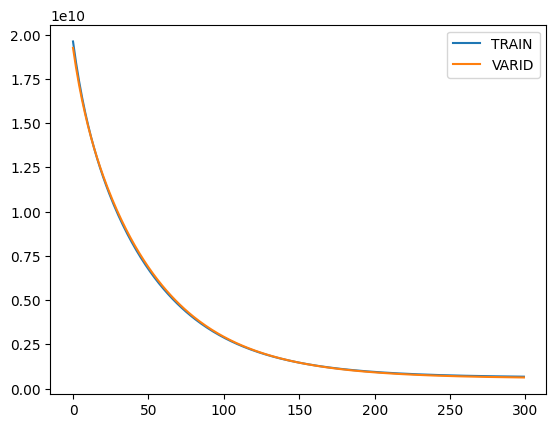

In [5]:
plt.plot(slr.loss, label='TRAIN')
plt.plot(slr.val_loss, label='VARID')
plt.legend()
plt.show()

## 【問題8】（アドバンス課題）バイアス項の除去

[epoch 1] loss: 19610192755.663925 val_loss: 19247957148.539726
[epoch 50] loss: 17193169470.26851 val_loss: 17433384696.63366
[epoch 100] loss: 17150969804.391523 val_loss: 17407732930.91232
[epoch 150] loss: 17132168858.377176 val_loss: 17381019958.15673
[epoch 200] loss: 17120816668.003132 val_loss: 17359938056.630398
[epoch 250] loss: 17113164061.267637 val_loss: 17342309799.181477
[epoch 300] loss: 17107703908.641567 val_loss: 17327361669.712757


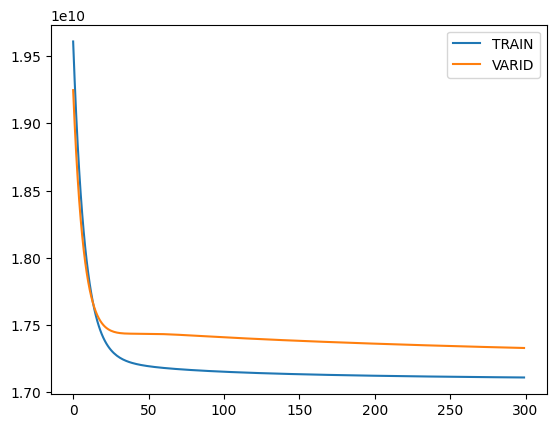

In [6]:
slr = ScratchLinearRegression(num_iter=300, lr=0.01, no_bias=True, verbose=True)
slr.fit(X_train_std, y_train, X_test_std, y_test)

plt.plot(slr.loss, label='TRAIN')
plt.plot(slr.val_loss, label='VARID')
plt.legend()
plt.show()

## 【問題9】（アドバンス課題）特徴量の多次元化

[epoch 1] loss: 19610192755.663925 val_loss: 19247957148.539726
[epoch 50] loss: 6897460842.331489 val_loss: 6922419399.471154
[epoch 100] loss: 2903668090.9668975 val_loss: 2957386863.1681066
[epoch 150] loss: 1436781178.1599405 val_loss: 1507272633.033248
[epoch 200] loss: 891506129.1218536 val_loss: 974438314.5112756
[epoch 250] loss: 685173492.772226 val_loss: 777721721.2964078
[epoch 300] loss: 604502120.8023885 val_loss: 704444049.210399


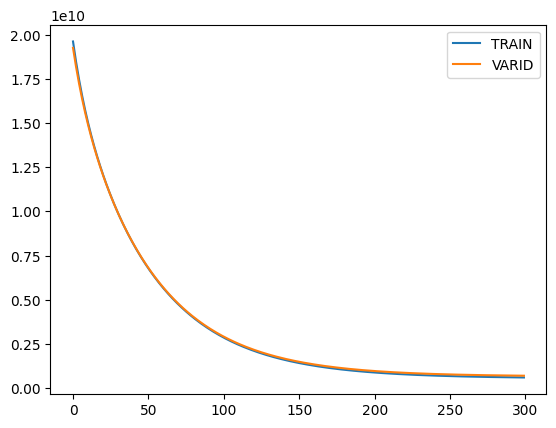

In [7]:
X_train_2 = X_train ** 2
X_test_2 = X_test ** 2

scaler = StandardScaler()
scaler.fit(X_train_2)
X_train_2_std = scaler.transform(X_train_2)
X_test_2_std = scaler.transform(X_test_2)

slr = ScratchLinearRegression(num_iter=300, lr=0.01, no_bias=False, verbose=True)
slr.fit(X_train_2_std, y_train, X_test_2_std, y_test)

plt.plot(slr.loss, label='TRAIN')
plt.plot(slr.val_loss, label='VARID')
plt.legend()
plt.show()

## 【問題10】（アドバンス課題）更新式の導出

$$
\begin{align}
    \theta_j &:= \theta_j - α \frac{\partial}{\partial \theta_j}J(\theta) \\
    &= \theta_j - α \frac{\partial}{\partial \theta_j} \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 \\
    &= \theta_j - α \frac{2}{2m} \sum_{i=1}^{m} [(h_\theta(x^{(i)})-y^{(i)}) (h_\theta(x^{(i)}))^{\prime}] \\
    &= \theta_j - α \frac{1}{m} \sum_{i=1}^{m} [(h_\theta(x^{(i)})-y^{(i)}) (\sum_{k=1}^{n} \theta_k x^{(i)}_k)^{\prime}] \\
    &= \theta_j - α \frac{1}{m} \sum_{i=1}^{m} [(h_\theta(x^{(i)})-y^{(i)}) x^{(i)}_j] \\
\end{align}
$$

## 【問題11】（アドバンス課題）局所最適解の問題

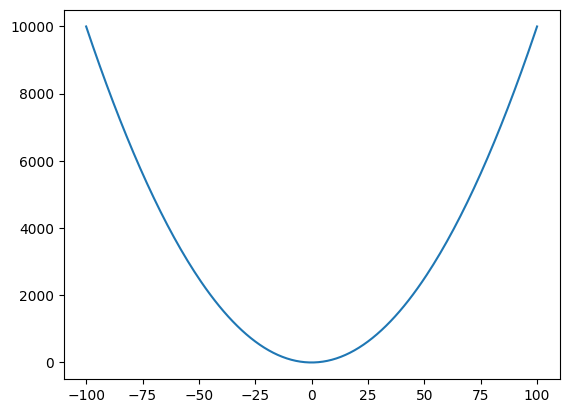

In [8]:
x = np.arange(-100,101,1)
J = x**2

plt.plot(x, J)
plt.show()

線形回帰では目的関数が上のような下に凸の二次関数になり、局所最適解が存在しないから。